In [2]:
pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 58.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
!python --version

Python 3.10.12


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from underthesea import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [9]:
data = pd.read_csv('/kaggle/input/vietnamese-text-classification-dataset/train.csv',names=['label', 'comment'])
data.head()

,label,comment
0,0,máy dùng hay bị đơ máy
1,0,chỉ có dây cáp nguồn không có adapter sao sử d...
2,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
3,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
4,2,Tuyệt vời. Hàng FPT cửa hàng


In [10]:
print(data['label'].unique())

[0 2 1]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    3040 non-null   int64 
 1   comment  3040 non-null   object
dtypes: int64(1), object(1)
memory usage: 47.6+ KB


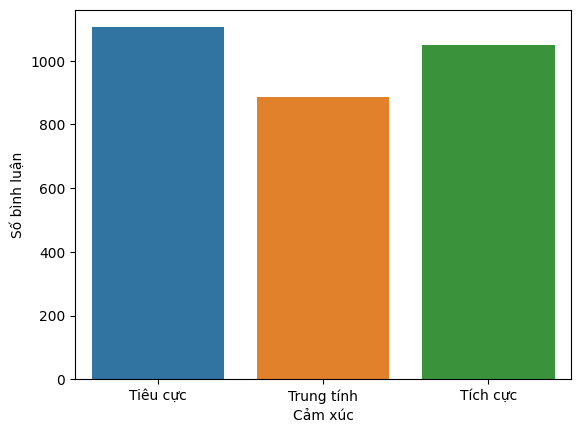

In [12]:
ax = sns.countplot(data,x='label')
plt.xlabel('Cảm xúc')
plt.ylabel('Số bình luận')
ax.set_xticklabels(['Tiêu cực', 'Trung tính', 'Tích cực'])
plt.show()

In [33]:
def remove_special_character(comment):
    comment = re.sub('\W+|http|https|www|com|COM|HTTP|HTTPS|WWW|net|NET|ORG|org', ' ', comment)
    comment = re.sub('[0-9]', ' ', comment)
    comment = re.sub('_', ' ', comment)
    comment = re.sub('(?<=\s) +|^ +(?=\s)', '', comment).strip()
    comment = comment.lower()
    return comment
      
input_data = data['comment'].values
X = []
Y = []
for idx, dt in enumerate(input_data):
    word = remove_special_character(dt)
    X.append(word)
    Y.append(dt)

In [42]:
print(X[103])
print(Y[103])

sản phẩm ok đóng gói đẹp giao hàng nhanh âm thanh tốt trong tầm giá pin dùng đến phút dự phòng được phút nói chung tương đối tốt
sản phẩm ok ,đóng gói đẹp, giao hàng nhanh, âm thanh tốt trong tầm giá, pin dùng 60 đến 70 phút ,dự phòng được 90 phút Nói chung tương đối tốt


In [23]:
y = data['label']
print(f'total_data = {len(X)}')

total_data = 3040


In [24]:
print(f'------------total data {len(X)}')
print(f'label {0} has { y.value_counts()[0] } datapoint')
print(f'label {1} has { y.value_counts()[1]} datapoint')
print(f'label {2} has { y.value_counts()[2] } datapoint')
print()

------------total data 3040
label 0 has 1105 datapoint
label 1 has 887 datapoint
label 2 has 1048 datapoint



In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'------------total train data {len(X_train)}')
print(f'label {0} has { y_train.value_counts()[0] } datapoint')
print(f'label {1} has { y_train.value_counts()[1]} datapoint')
print(f'label {2} has { y_train.value_counts()[2] } datapoint')
print()

print(f'------------total test data {len(X_test)}')
print(f'label {0} has { y_test.value_counts()[0] } datapoint')
print(f'label {1} has { y_test.value_counts()[1] } datapoint')
print(f'label {2} has { y_test.value_counts()[2] } datapoint')

------------total train data 2432
label 0 has 864 datapoint
label 1 has 712 datapoint
label 2 has 856 datapoint

------------total test data 608
label 0 has 241 datapoint
label 1 has 175 datapoint
label 2 has 192 datapoint


In [26]:
tfidf_vectorizer = TfidfVectorizer()

X_vectors = tfidf_vectorizer.fit(X)

X_train_vectors = tfidf_vectorizer.transform(X_train)
X_test_vectors = tfidf_vectorizer.transform(X_test)

In [27]:
print(tfidf_vectorizer.get_feature_names_out())

['aa' 'abc' 'ac' ... 'ủng' 'ức' 'ứng']


In [28]:
print(f'tf-idf len vocal : {X_train_vectors.shape[-1]}')
print(f'tf-idf len vocal : {X_test_vectors.shape[-1]}')

tf-idf len vocal : 2786
tf-idf len vocal : 2786


In [29]:
#Use Radial Basis Function kernel
rbf = SVC()

# Fit mô hình trên train data
rbf.fit(X_train_vectors, y_train)

# Predict trên test data
y_test_pred_rbf = rbf.predict(X_test_vectors)

In [30]:
import sklearn.metrics as metrics

accuracy = metrics.accuracy_score(y_true = y_test, y_pred = y_test_pred_rbf)
print(f'The test accuracy is: {accuracy}')

f1_score = metrics.f1_score(y_true = y_test, y_pred = y_test_pred_rbf, average = None)
print(f'The test f1_score is: {f1_score}')

f1_micro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred_rbf, average = 'micro')
print(f'The test f1_micro is: {f1_micro}')

f1_macro = metrics.f1_score(y_true = y_test, y_pred = y_test_pred_rbf, average = 'macro')
print(f'The test f1_macro is: {f1_macro}')

The test accuracy is: 0.8289473684210527
The test f1_score is: [0.8582996  0.72727273 0.88188976]
The test f1_micro is: 0.8289473684210527
The test f1_macro is: 0.8224873620646517


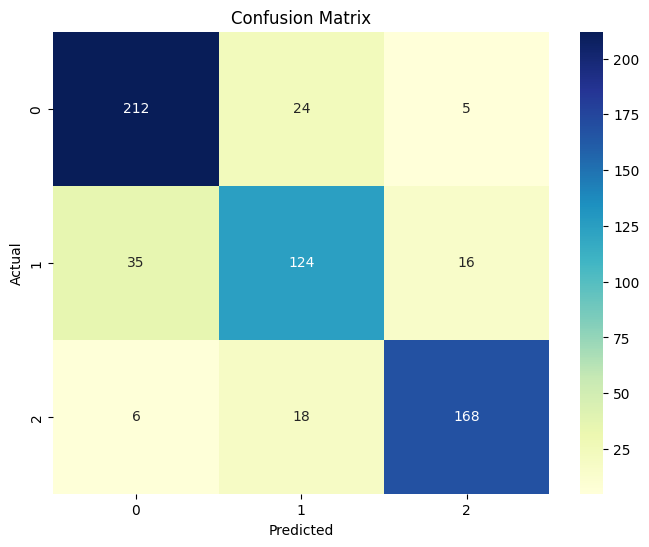

In [31]:
cm_test_rbf = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rbf,cmap="YlGnBu", annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()